# Ejemplos de clasificación (SNAIC 2022)

In [1]:
# Needed libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

## Visualización del dataset

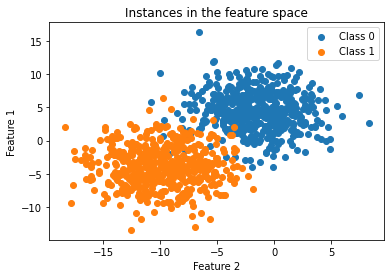

In [5]:
# Dataset creation for clasification
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=1, cluster_std=3)

# Plot the dataset
for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(y == class_value)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired', label='Class ' + str(class_value))

plt.title('Instances in the feature space')
plt.ylabel('Feature 1')
plt.xlabel('Feature 2')
plt.legend()
plt.show()

## Definición de los modelos

In [3]:

Models = [ KNeighborsClassifier(n_neighbors=3), GaussianNB(), SVC(kernel='linear',gamma='auto'), SVC(kernel='poly',gamma='auto'),
         SVC(kernel='rbf',gamma='auto'), tree.DecisionTreeClassifier(), RandomForestClassifier(max_depth=2, random_state=0), LogisticRegression(),
         MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5), random_state=1), 
         MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10,10,10), random_state=1), ]
Models_labels = ['kNN', 'Naive Bayes', 'Linear SVM', 'Polynomial SVM', 'RBF SVM', 'Decision Tree', 'Random Forest', 'Logistic Regression', 'MLP 1', 'MLP 2']


# define bounds of the domain
min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1

# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)

# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

## Entrenamiento de los modelos y visualización del clasificador en todo el conjunto de datos

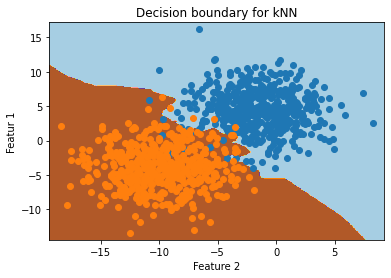

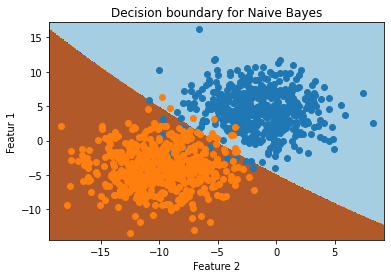

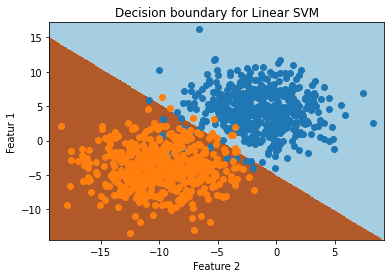

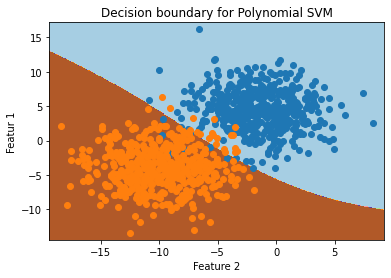

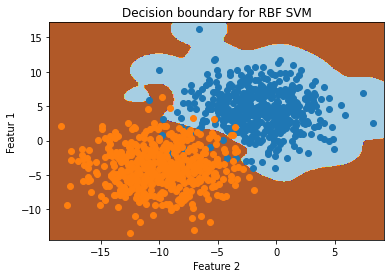

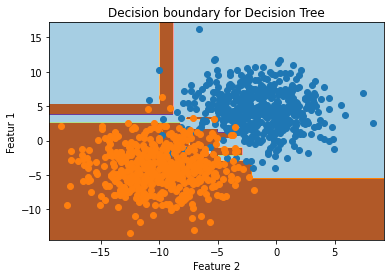

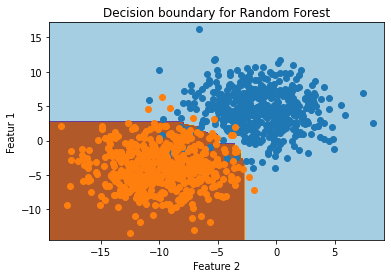

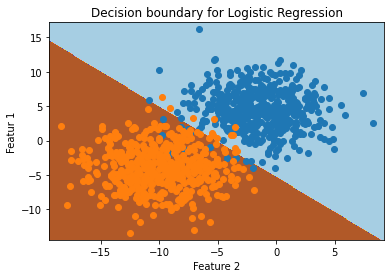

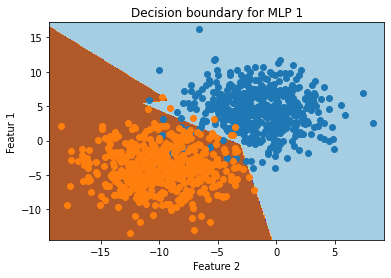

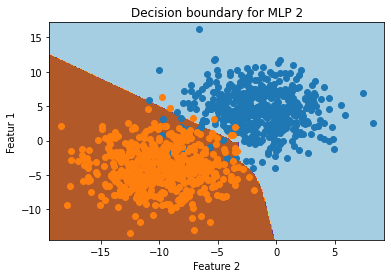

In [6]:

i = 0
for model in Models:
    
    # define the model
    clf = model
    
    # fit the model
    clf.fit(X, y)
    
    # make predictions for the grid
    yhat = clf.predict(grid)
    
    # reshape the predictions back into a grid
    zz = yhat.reshape(xx.shape)
    
    # plot the grid of x, y and z values as a surface
    plt.contourf(xx, yy, zz, cmap='Paired')
    
    # create scatter plot for samples from each class
    for class_value in range(2):
        
        # get row indexes for samples with this class
        row_ix = np.where(y == class_value)
        
        # create scatter of these samples
        plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')


    plt.title('Decision boundary for ' + Models_labels[i])
    plt.ylabel('Featur 1')
    plt.xlabel('Feature 2')
    plt.show()
    
    i += 1

## Entrenamiento del modelo de forma adecuada (train and test split)

In [7]:
# split train and test sets
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(max_depth=2, random_state=0)
#clf = tree.DecisionTreeClassifier()

# Train classifier
clf.fit(X_train,y_train);

## Evaluación del modelo en el conjunto de entrenamiento

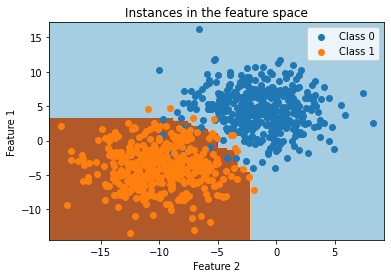

In [11]:
# make predictions for the grid
yhat = clf.predict(grid)

# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)

# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='Paired')

# create scatter plot for train set
for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(y_train == class_value)
    # create scatter of these samples
    plt.scatter(X_train[row_ix, 0], X_train[row_ix, 1], cmap='Paired', label='Class ' + str(class_value))


    
plt.title('Instances in the feature space')
plt.ylabel('Feature 1')
plt.xlabel('Feature 2')
plt.legend()
plt.show()

## Evaluación del modelo en el conjunto de prueba

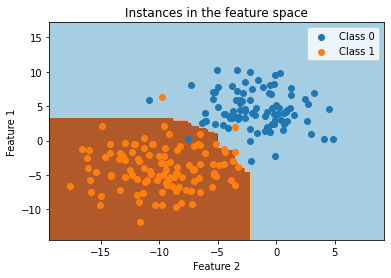

In [12]:
# make predictions for the grid
yhat = clf.predict(grid)

# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)

# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='Paired')

# create scatter plot for test set
for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(y_test == class_value)
    # create scatter of these samples
    plt.scatter(X_test[row_ix, 0], X_test[row_ix, 1], cmap='Paired', label='Class ' + str(class_value))


    
plt.title('Instances in the feature space')
plt.ylabel('Feature 1')
plt.xlabel('Feature 2')
plt.legend()
plt.show()

In [105]:
# get the performance

y_true = y_test
y_pred = clf.predict(X_test)

target_names = ['class 0', 'class 1']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.97      0.99      0.98        91
     class 1       0.99      0.97      0.98       109

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200

